# Import

In [48]:
import csv
import os
import sys

import numpy as np
import pandas as pd
from nltk import word_tokenize, download
from stop_words import get_stop_words
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from tqdm import tqdm
import matplotlib.pyplot as plt

## Add configuration file

In [2]:
sys.path.append("/home/jovyan/core/config/")
sys.path.append("/home/jovyan/core/util/")

In [3]:
from ALL import config 
from util import *

## Set condition

In [4]:
tqdm.pandas()
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 50)

In [5]:
s3 = S3Manager()

In [6]:
data_types = ["AgNews", "AgNewsTitle", "20News"]

In [28]:
download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Read data

In [7]:
df_paths = {
    data_type: s3.download(f"Preprocessing/{data_type}/master.csv")[0]
    for data_type in data_types
}

In [9]:
dfs = {data_type: pd.read_csv(df_path, index_col=0) for data_type, df_path in df_paths.items()}

In [10]:
labels_paths = {data_type: s3.download(f"Preprocessing/{data_type}/class.csv")[0] for data_type in data_types}

In [11]:
class_labels = {}
for data_type, labels_path in labels_paths.items():
    with open(labels_path, mode="r") as f:
        reader = csv.reader(f)
        class_labels[data_type] = [label for label in reader]

# Split texts

In [30]:
for data_type in data_types:
    dfs[data_type]["sentences"] = dfs[data_type]["text"].progress_apply(sent_tokenize)
    dfs[data_type]["sentence_count"] = dfs[data_type]["sentences"].apply(len)

100%|██████████| 18770/18770 [00:11<00:00, 1620.13it/s]


# Visualize

## Describe

In [31]:
for data_type in data_types:
    print(data_type)
    print(dfs[data_type]["sentence_count"].describe())

AgNews
count    120000.000000
mean          1.286283
std           0.616194
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          15.000000
Name: sentence_count, dtype: float64
AgNewsTitle
count    120000.000000
mean          1.020883
std           0.153831
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: sentence_count, dtype: float64
20News
count    18770.000000
mean        14.927597
std         19.045801
min          1.000000
25%          6.000000
50%         10.000000
75%         16.000000
max        393.000000
Name: sentence_count, dtype: float64


In [46]:
dfs["20News"]["sentence_count"].quantile(0.99)

95.0

In [47]:
dfs["20News"]["sentence_count"]

0        10
1         7
2        40
3        30
4         7
         ..
18841    16
18842     7
18843     8
18844    13
18845    13
Name: sentence_count, Length: 18770, dtype: int64

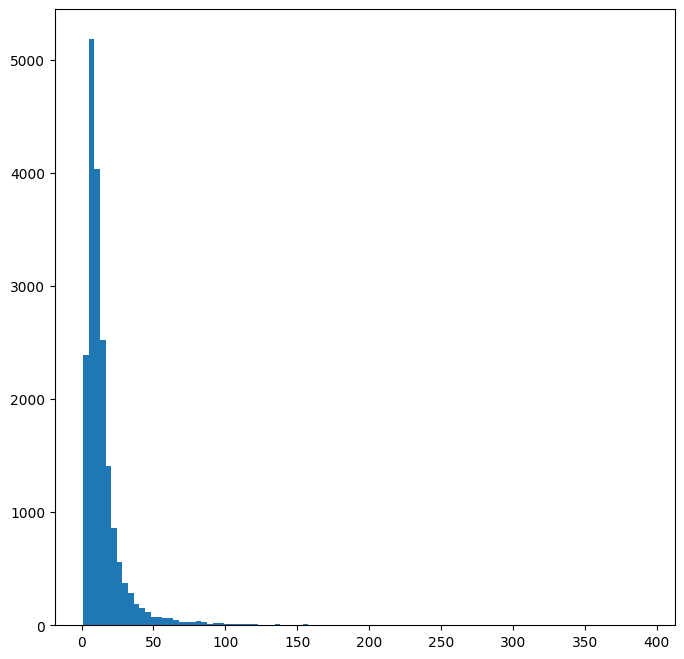

In [53]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.hist(dfs["20News"]["sentence_count"], bins=100)
plt.show()

In [25]:
shutil.rmtree("../../nltk_data/")